<a href="https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part2/S04_Exercises9_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 9

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import trapz, quad, cumtrapz
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings('ignore')

Pour organiser mes données, j'utilise un Dataframe Pandas, relativement agréable visuellement

In [0]:
data = pd.DataFrame(
    data = {
        't': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14],
        'C': [0, 1, 5, 8, 10, 8, 6, 4, 3, 2.2, 1.5, 0.6, 0]
    }
)

data['E'] = data.C / trapz(x=data.t, y=data.C)

In [3]:
data

,C,t,E
0,0.0,0,0.000000
1,1.0,1,0.019743
2,5.0,2,0.098717
3,8.0,3,0.157947
4,10.0,4,0.197433
5,8.0,5,0.157947
6,6.0,6,0.118460
7,4.0,7,0.078973
8,3.0,8,0.059230
9,2.2,9,0.043435


In [0]:
E = interp1d(x=data.t, y=data.E, kind='slinear')

In [0]:
ts = np.linspace(0, 14, 1000)
Es = E(ts)

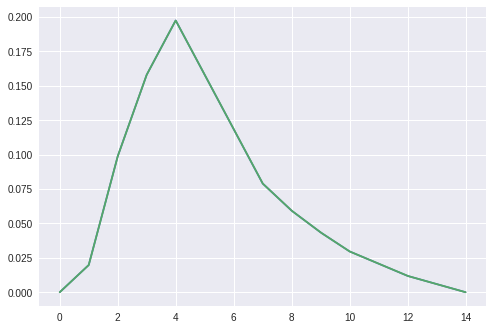

In [6]:
plt.plot(data['t'], data['E'], ts, Es)
plt.show()

In [7]:
f_3_6, _ = quad(E, 3, 6)

f_3_6 * 100

49.358341559723584

In [8]:
f_775_825, _ = quad(E, 7.75, 8.25)

f_775_825 * 100

2.973840078973346

In [9]:
f_less_than_3, _ = quad(E, 0, 3)

f_less_than_3 * 100

19.743336623889434

## Exercice 10

In [0]:
F = [quad(E, 0, t)[0] for t in data.t] # possible également d'utiliser cumtrapz
F_with_cumtrapz = cumtrapz(x=data.t, y=data.E)

## Exercice 11

In [11]:
tm = trapz(x=data.t, y=data.t * data.E) 
tm

5.127344521224086

In [12]:
sigma2 = trapz(x=data.t, y=(data.t-tm)**2 * data.E)
sigma2

5.95120686748479

In [0]:
s3 = sigma2**(-3/4) * trapz(x=data.t, y=(data.t-tm)**3 * data.E)